In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('StudentsPerformance.csv')

In [28]:
print (df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [30]:
df.shape

(1000, 8)

In [31]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [32]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [33]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [34]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [35]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [36]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [37]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [5]:
df['total']=df['math score']+df['reading score']+df['writing score']

In [7]:
df['average']=df['total']/3

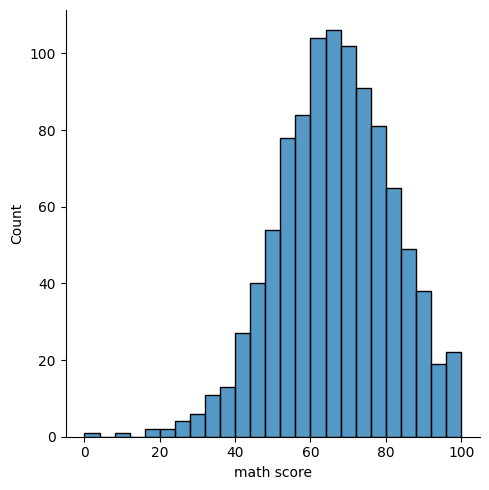

In [9]:
sns.displot(df['math score'])

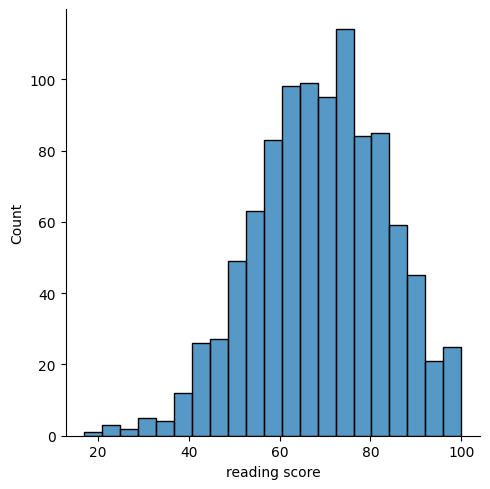

In [11]:
sns.displot(df['reading score '])

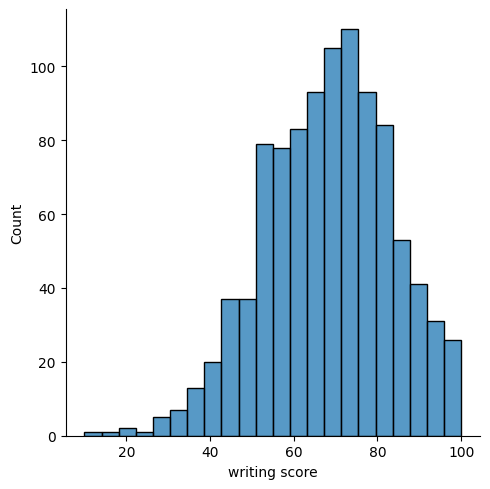

In [15]:
sns.displot(df['writing score'])

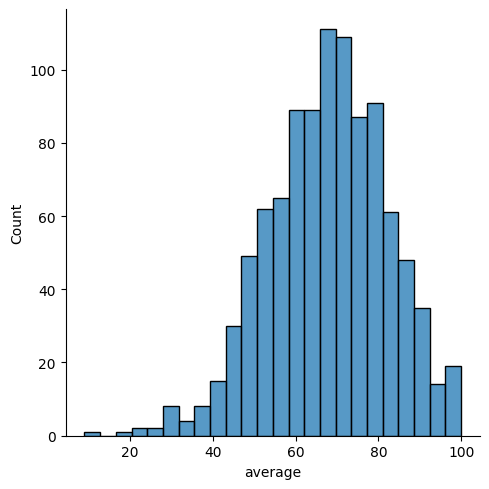

In [16]:
sns.displot(df['average'])

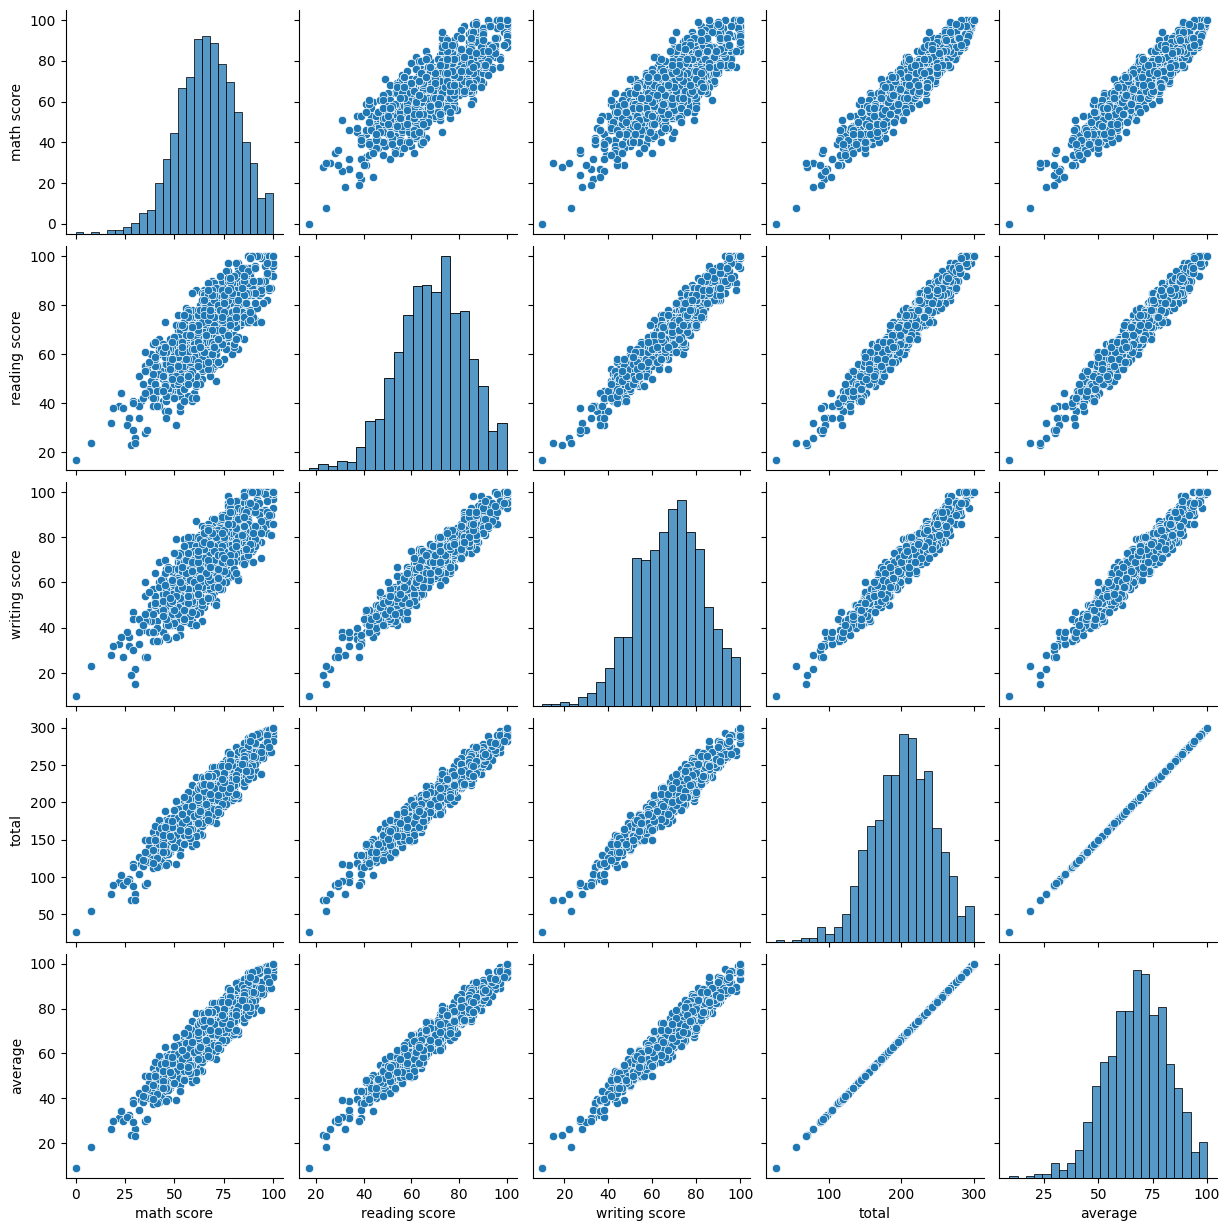

In [17]:
sns.pairplot(df)

<Axes: xlabel='race/ethnicity', ylabel='average'>

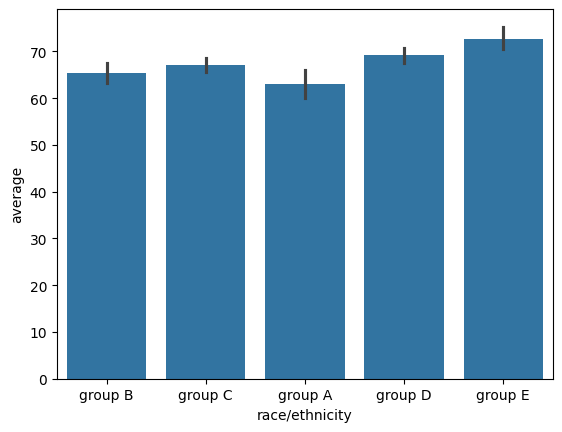

In [21]:
# Create the barplot
sns.barplot(x='race/ethnicity', y='average', data=df)


<Axes: xlabel='parental level of education', ylabel='average'>

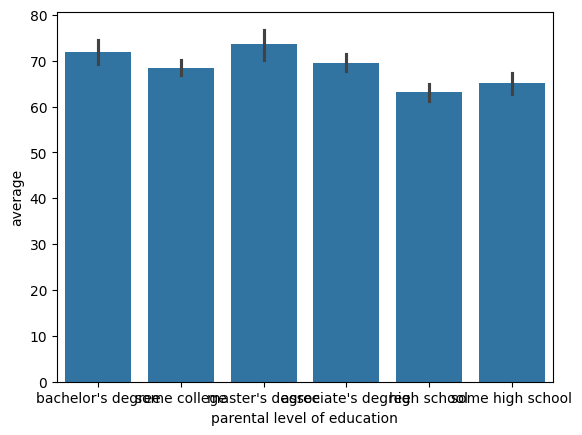

In [22]:
# Create the barplot
sns.barplot(x='parental level of education', y='average', data=df)


<Axes: xlabel='test preparation course', ylabel='average'>

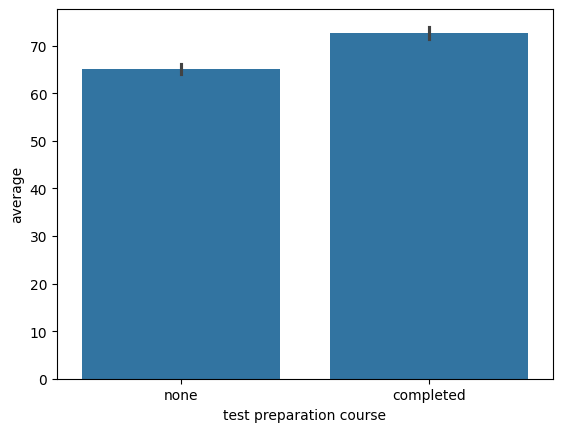

In [23]:

sns.barplot(x='test preparation course', y='average', data=df)


In [31]:
df['math_Pass_status']=np.where(df['math score']<40,'F','P')

In [32]:
df['read_Pass_status']=np.where(df['reading score']<40,'F','P')

In [33]:
df['write_Pass_status']=np.where(df['writing score']<40,'F','P')

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average,math_Pass_status,reading_Pass_status,writing_Pass_status,write_Pass_status,read_Pass_status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,P,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,P,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,P,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,P,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,229,76.333333,P,P,P,P,P


In [35]:
df['math_Pass_status'].value_counts()

math_Pass_status
P    960
F     40
Name: count, dtype: int64

In [36]:
df['read_Pass_status'].value_counts()

read_Pass_status
P    974
F     26
Name: count, dtype: int64

In [37]:
df['write_Pass_status'].value_counts()

write_Pass_status
P    968
F     32
Name: count, dtype: int64

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [7]:
X=df[['math score' , 'reading score', 'writing score']]

In [8]:
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [34]:
y_math=X['math score']
y_reading=X['reading score']
y_writing=X['writing score']

In [10]:
y_math

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [35]:
X_math=X[['reading score','writing score']]
X_reading=X[['math score','writing score']]
X_writing=X[['reading score','math score']]

In [36]:
X_math_train, X_math_test, y_math_train, y_math_test=train_test_split(X_math, y_math, train_size=0.7) 
X_reading_train, X_reading_test, y_reading_train, y_reading_test=train_test_split(X_reading, y_reading, train_size=0.7) 
X_writing_train, X_writing_test, y_writing_train, y_writing_test=train_test_split(X_writing, y_writing, train_size=0.7) 


In [37]:
math_model=LinearRegression()
reading_model=LinearRegression()
writing_model=LinearRegression()


math_model.fit(X_math_train, y_math_train)
reading_model.fit(X_reading_train, y_reading_train)
writing_model.fit(X_writing_train, y_writing_train)


math_R2=math_model.score(X_math_test, y_math_test)
reading_R2=reading_model.score(X_reading_test, y_reading_test)
writing_R2=writing_model.score(X_writing_test, y_writing_test)


In [38]:
print(f"Math R^2 : {math_R2} ")
print(f"Reading R^2 : {reading_R2} ")
print(f"Writing R^2 : {writing_R2} ")

Math R^2 : 0.6859971614967226 
Reading R^2 : 0.9123709970514875 
Writing R^2 : 0.903096155224369 
